In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/makanan'
!ls "/content/drive/MyDrive/makanan"

bahan  latih  validasi


In [ ]:
# menentukan direktori

bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
#  menentukan direktori isi bahan

man_dir = os.path.join(bahan_dir, 'man/')
fruits_dir = os.path.join(bahan_dir, 'fruits/')
flower_dir = os.path.join(bahan_dir, 'flower/')

# Print jumlah data
print("Jumlah Data ")
print('total man images:', len(os.listdir(man_dir)))
print('total fruits images:', len(os.listdir(fruits_dir)))
print('total flower images:', len(os.listdir(flower_dir)))

Jumlah Data 
total man images: 87
total fruits images: 87
total flower images: 87


In [ ]:
# Direktori isi latih/training
train_man = os.path.join(train_dir, 'man/')
train_fruits = os.path.join(train_dir, 'fruits/')
train_flower = os.path.join(train_dir, 'flower/')

# direktori isi validasi
validation_man = os.path.join(validation_dir, 'man/')
validation_fruits = os.path.join(validation_dir, 'fruits/')
validation_flower = os.path.join(validation_dir, 'flower/')

In [ ]:
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    if not os.path.exists(source):
        print(f"Error: Folder sumber tidak ditemukan -> {source}")
        return
    if not os.path.exists(train):
        os.makedirs(train) # Buat folder jika belum ada
    if not os.path.exists(val):
        os.makedirs(val) # Buat folder jika belum ada

    total_files = os.listdir(source)
    total_size = len(total_files)

    if total_size == 0:
        print(f"Error: Folder sumber kosong -> {source}")
        return

    train_size = int(total_size * train_ratio)
    val_size = total_size - train_size

    randomized = random.sample(total_files, total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if os.path.exists(i_file): # Cek apakah file benar-benar ada
            copyfile(i_file, destination)
        else:
            print(f"File tidak ditemukan: {i_file}")

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if os.path.exists(i_file):
            copyfile(i_file, destination)
        else:
            print(f"File tidak ditemukan: {i_file}")

train_ratio = 0.9

# Cek apakah variabel path sudah didefinisikan sebelumnya
try:
    source_00 = man_dir
    train_00 = train_man
    val_00 = validation_man
    train_val_split(source_00, train_00, val_00, train_ratio)

    source_01 = fruits_dir
    train_01 = train_fruits
    val_01 = validation_fruits
    train_val_split(source_01, train_01, val_01, train_ratio)

    source_01 =flower_dir
    train_01 = train_flower
    val_01 = validation_flower
    train_val_split(source_01, train_01, val_01, train_ratio)

except NameError as e:
    print(f"Error: Variabel tidak didefinisikan - {e}")

In [ ]:
print('Jumlah data latih man:', len(os.listdir(man_dir)))
print('Jumlah data latih man:', len(os.listdir(train_man)))
print('jumlah val man:', len(os.listdir(validation_man)))

Jumlah data latih man: 87
Jumlah data latih man: 86
jumlah val man: 17


In [ ]:
#Persiapan alat buat deep learn, cara bljr, mempersiapkan gambar untuk pelatihan
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( #untuk melatih model.
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range=0.2,
                    zoom_range = 0.1
)

validation_datagen = ImageDataGenerator( #untuk mengukur performa model saat training.
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range=0.2,
                    zoom_range = 0.1
                    )

In [ ]:
# memuat gambar dari folder dan secara otomatis mengelompokkan gambar berdasarkan nama foldernya (klasifikasi).


train_generator = train_datagen.flow_from_directory(
        train_dir, # path ke folder gambar training.
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

val_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 258 images belonging to 3 classes.
Found 52 images belonging to 3 classes.


In [ ]:
#menghentikan training secara otomatis jika akurasi model sudah mencapai lebih dari 99%.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi mencapai 99%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# mengklasifikasikan gambar ke dalam 3 kelas menggunakan Convolutional Neural Network (CNN).
model = tf.keras.models.Sequential ([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed =112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(3, activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     1,849,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,971,195 (7.52 MB)

 Trainable params: 1,971,195 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# menyiapkan model sebelum dilatih .
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'Adam',
    metrics=['accuracy']
)

In [ ]:
#  melatih model menggunakan data training dan validasi.
history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 9/32 ━━━━━━━━━━━━━━━━━━━━ 17s 778ms/step - accuracy: 0.3799 - loss: 1.2726

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 416ms/step - accuracy: 0.3771 - loss: 1.2370 - val_accuracy: 0.6562 - val_loss: 1.0784
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.4187 - loss: 1.0753 - val_accuracy: 0.6562 - val_loss: 0.9977
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.4589 - loss: 1.0088 - val_accuracy: 0.6250 - val_loss: 0.8681
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.5614 - loss: 0.8970 - val_accuracy: 0.5938 - val_loss: 0.8183
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.6624 - loss: 0.7932 - val_accuracy: 0.7188 - val_loss: 0.7164
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.6741 - loss: 0.7423 - val_accuracy: 0.5312 - val_loss: 1.0163
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.6755 - loss: 0.7039 - val_accuracy: 0.6875 - val_loss: 0.7863
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.6828 - loss: 0.7875 - val_accuracy: 0.8125 

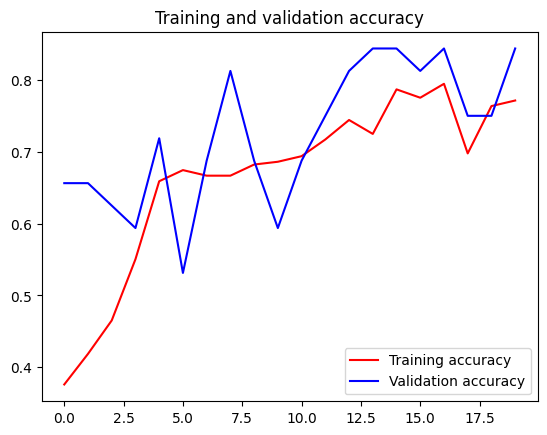

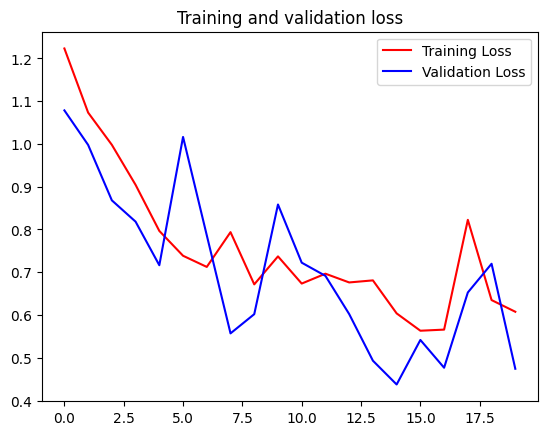

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

# Red training, blue validation.

Saving images (9).jpg to images (9).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
images (9).jpg
This image belongs to class man


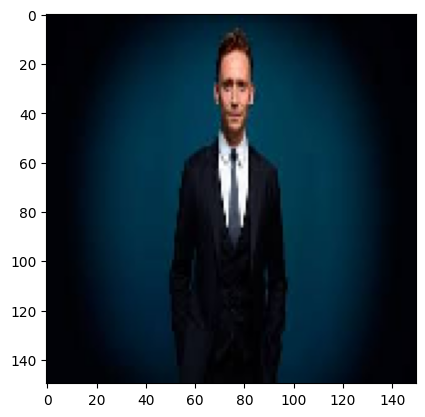

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  class_list = os.listdir(train_dir)

  predicted_class_index = np.argmax(classes[0])
  print('This image belongs to class', class_list[predicted_class_index]) # Use predicted_class_index instead of j